In [5]:
import pandas as pd

# Load the dataset

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(df)


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [6]:
# Display the first 5 rows to understand the data
print("First 5 rows of the dataset:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))



First 5 rows of the dataset:
| id    | gender   | age   | hypertension   | heart_disease   | ever_married   | work_type     | Residence_type   | avg_glucose_level   | bmi   | smoking_status   | stroke   |
|:------|:---------|:------|:---------------|:----------------|:---------------|:--------------|:-----------------|:--------------------|:------|:-----------------|:---------|
| 9046  | Male     | 67    | 0              | 1               | Yes            | Private       | Urban            | 228.69              | 36.6  | formerly smoked  | 1        |
| 51676 | Female   | 61    | 0              | 0               | Yes            | Self-employed | Rural            | 202.21              | nan   | never smoked     | 1        |
| 31112 | Male     | 80    | 0              | 1               | Yes            | Private       | Rural            | 105.92              | 32.5  | never smoked     | 1        |
| 60182 | Female   | 49    | 0              | 0               | Yes            | Private   

In [7]:
# Display column information to check data types and non-null counts
print("\nColumn information:")
print(df.info())


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [8]:
# Missing 'bmi' values replaced with the mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

print("\nBMI missing values after imputation:")
print(df['bmi'].isnull().sum())


BMI missing values after imputation:
0


In [9]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns for encoding
categorical_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("\nDataFrame after encoding categorical variables (first 5 rows):")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))



DataFrame after encoding categorical variables (first 5 rows):
| id    | gender   | age   | hypertension   | heart_disease   | ever_married   | work_type   | Residence_type   | avg_glucose_level   | bmi     | smoking_status   | stroke   |
|:------|:---------|:------|:---------------|:----------------|:---------------|:------------|:-----------------|:--------------------|:--------|:-----------------|:---------|
| 9046  | 1        | 67    | 0              | 1               | 1              | 2           | 1                | 228.69              | 36.6    | 1                | 1        |
| 51676 | 0        | 61    | 0              | 0               | 1              | 3           | 0                | 202.21              | 28.8932 | 2                | 1        |
| 31112 | 1        | 80    | 0              | 1               | 1              | 2           | 0                | 105.92              | 32.5    | 2                | 1        |
| 60182 | 0        | 49    | 0              | 0         

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get correlations with the 'stroke' column and sort them
stroke_correlations = correlation_matrix['stroke'].sort_values(ascending=False)

print("\nCorrelations with 'stroke' column:")
print(stroke_correlations.to_markdown(numalign="left", stralign="left"))


Correlations with 'stroke' column:
|                   | stroke     |
|:------------------|:-----------|
| stroke            | 1          |
| age               | 0.245257   |
| heart_disease     | 0.134914   |
| avg_glucose_level | 0.131945   |
| hypertension      | 0.127904   |
| ever_married      | 0.10834    |
| bmi               | 0.0389466  |
| smoking_status    | 0.0281227  |
| Residence_type    | 0.015458   |
| gender            | 0.00892887 |
| id                | 0.00638817 |
| work_type         | -0.0323161 |


In [11]:
# It is not surprising that age is the number one correlation with stroke.
# Heart disease, glucose level, and hypertension come in next at roughly half the correlation of age.
# The big surprise is correlation with marriage and low correlation with bmi and smoking.
# Below is the full sequence with visualization


Matplotlib is building the font cache; this may take a moment.


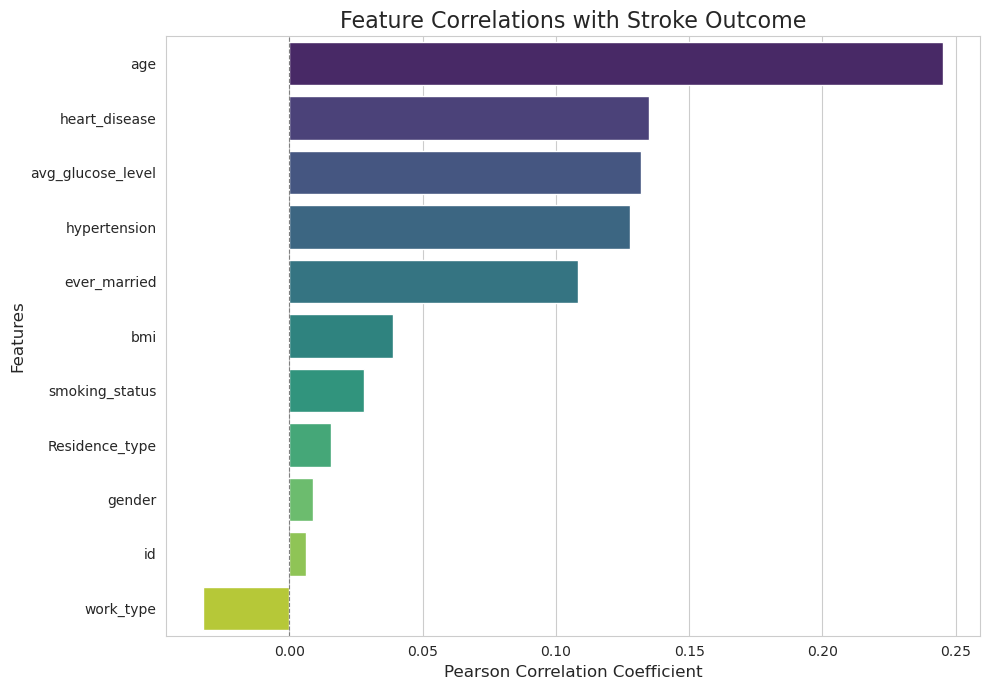

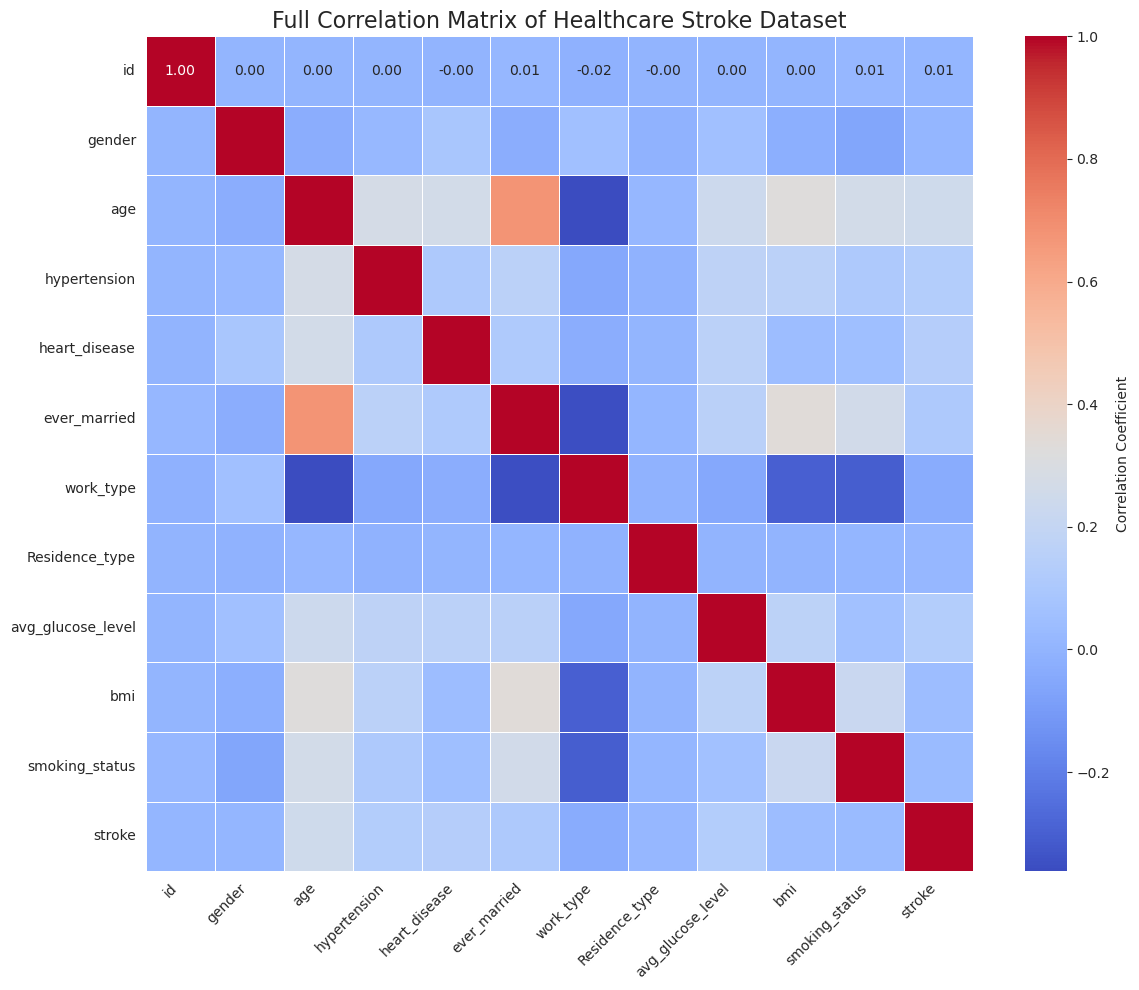

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Load the Data ---
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# --- Step 2: Handle Missing Values ---
# Use the mean in place of missing 'bmi' values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# --- Step 3: Encode Categorical Variables ---
# Identify column categories
categorical_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# --- Step 4: Calculate Correlations ---
correlation_matrix = df.corr()

# Get correlations with the 'stroke' column and sort them
# Exclude 'stroke' from the list as its correlation will obviously be 1
stroke_correlations = correlation_matrix['stroke'].drop('stroke').sort_values(ascending=False)

# --- Step 5: Visualize the Correlation Results ---

# Set a style for the plots
sns.set_style("whitegrid")

# 1. Bar Plot of Feature Correlations with 'Stroke'
plt.figure(figsize=(10, 7))
sns.barplot(x=stroke_correlations.values, y=stroke_correlations.index, palette='viridis')
plt.title('Feature Correlations with Stroke Outcome', fontsize=16)
plt.xlabel('Pearson Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8) # Add a line at 0 for reference
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# 2. Heatmap of the Full Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Show the correlation values on the heatmap
    cmap='coolwarm',    # Color map (coolwarm shows divergence from 0)
    fmt=".2f",          # Format annotations to two decimal places
    linewidths=.5,      # Add lines between cells
    cbar_kws={'label': 'Correlation Coefficient'} # Color bar label
)
plt.title('Full Correlation Matrix of Healthcare Stroke Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for readability
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [13]:
# Next I need to examine if multiple factors combine to create higher correlations.


Shape of training features (X_train): (4088, 10)
Shape of testing features (X_test): (1022, 10)

--- Logistic Regression Analysis ---

Logistic Regression Coefficients (indicating multivariate association):
| Feature           | Coefficient   |
|:------------------|:--------------|
| hypertension      | 0.506261      |
| heart_disease     | 0.301043      |
| age               | 0.0611451     |
| Residence_type    | 0.0342722     |
| gender            | 0.0279439     |
| avg_glucose_level | 0.00356841    |
| bmi               | -0.0245113    |
| smoking_status    | -0.0326687    |
| work_type         | -0.127446     |
| ever_married      | -0.375944     |

Logistic Regression Accuracy: 0.9511

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50    

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

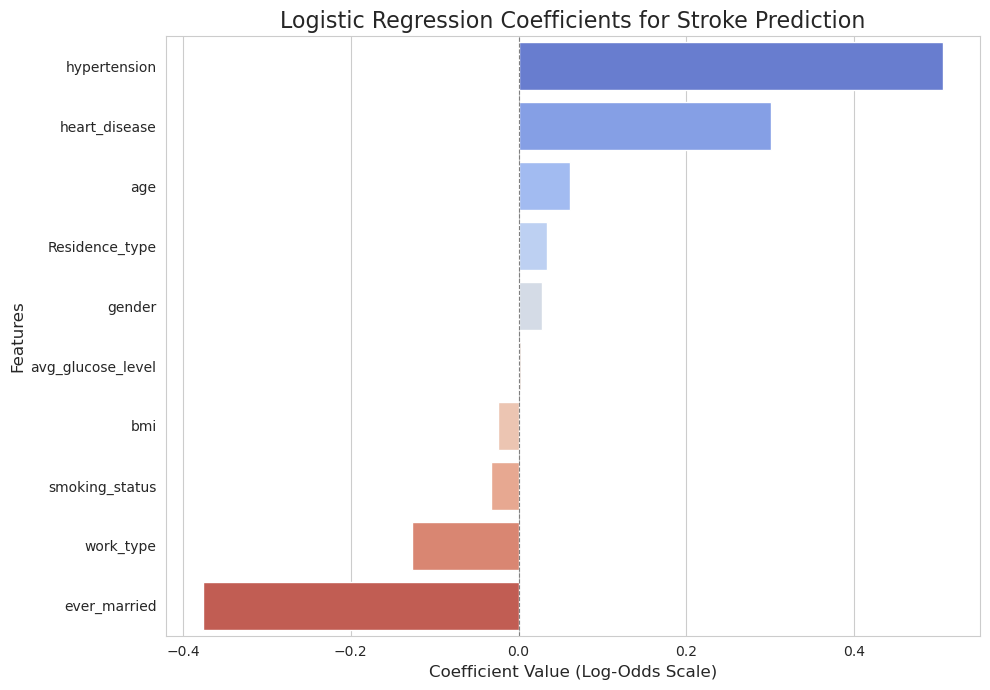


--- Random Forest Feature Importance Analysis ---

Random Forest Feature Importances:
| Feature           | Importance   |
|:------------------|:-------------|
| avg_glucose_level | 0.283008     |
| bmi               | 0.236145     |
| age               | 0.227587     |
| smoking_status    | 0.0723464    |
| work_type         | 0.0490563    |
| gender            | 0.0335358    |
| Residence_type    | 0.0311269    |
| hypertension      | 0.0229647    |
| heart_disease     | 0.0229518    |
| ever_married      | 0.0212776    |

Random Forest Accuracy: 0.9491

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



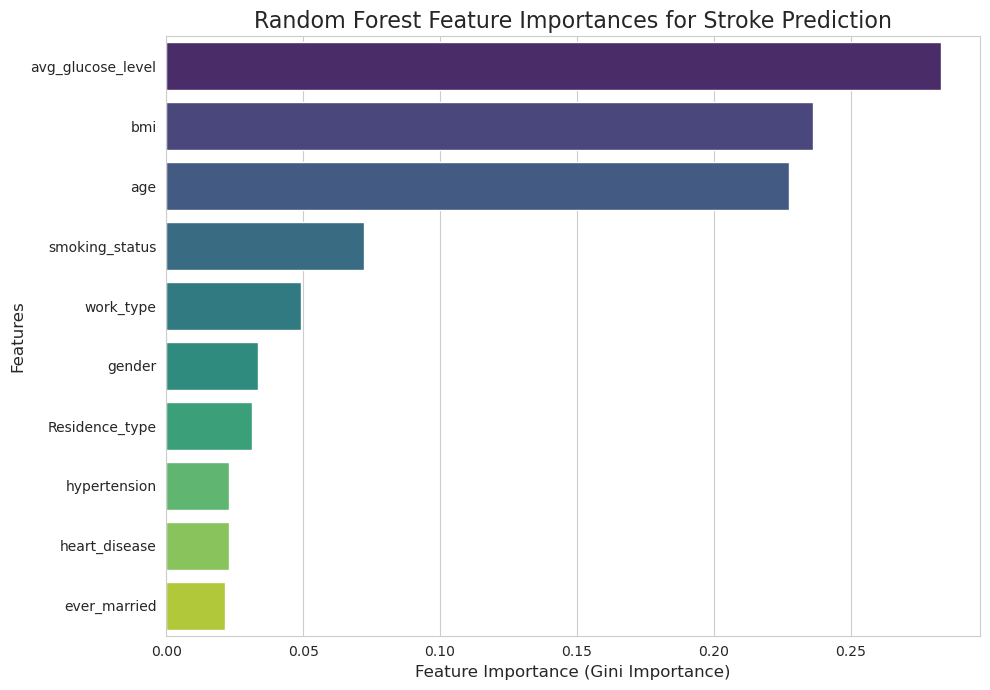

In [17]:
#  Multivariate Correlation Analysis for Stroke Prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans # Ensure this import is present and active
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-load and Preprocess Data (as done in previous steps) ---
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Handle missing values in 'bmi'
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Identify and encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# --- Prepare Data for Modeling ---
# Features (X) - all columns except 'id' and 'stroke'
X = df.drop(['id', 'stroke'], axis=1)
# Target (y)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the proportion of stroke cases is the same in both train and test sets,
# which is important for imbalanced datasets.

print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)

# --- Method 1: Logistic Regression ---
print("\n--- Logistic Regression Analysis ---")

# Initialize and train the Logistic Regression model
# max_iter increased for convergence, solver 'liblinear' is good for small datasets
# and handles L1/L2 regularization.
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=200)
log_reg_model.fit(X_train, y_train)

# Get the coefficients
# Coefficients represent the change in the log-odds of stroke for a one-unit increase in the feature.
# A positive coefficient means increased log-odds (higher probability of stroke).
# A negative coefficient means decreased log-odds (lower probability of stroke).
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Coefficients (indicating multivariate association):")
print(coefficients.to_markdown(index=False, numalign="left", stralign="left"))

# Optional: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
y_pred_log_reg = log_reg_model.predict(X_test)
print(f"\nLogistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Visualize Logistic Regression Coefficients
plt.figure(figsize=(10, 7))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title('Logistic Regression Coefficients for Stroke Prediction', fontsize=16)
plt.xlabel('Coefficient Value (Log-Odds Scale)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# --- Method 2: Feature Importance from Random Forest ---
print("\n--- Random Forest Feature Importance Analysis ---")

# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(feature_importances.to_markdown(index=False, numalign="left", stralign="left"))

# Optional: Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print(f"\nRandom Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Visualize Random Forest Feature Importances
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Random Forest Feature Importances for Stroke Prediction', fontsize=16)
plt.xlabel('Feature Importance (Gini Importance)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



--- K-Means Cluster Analysis ---


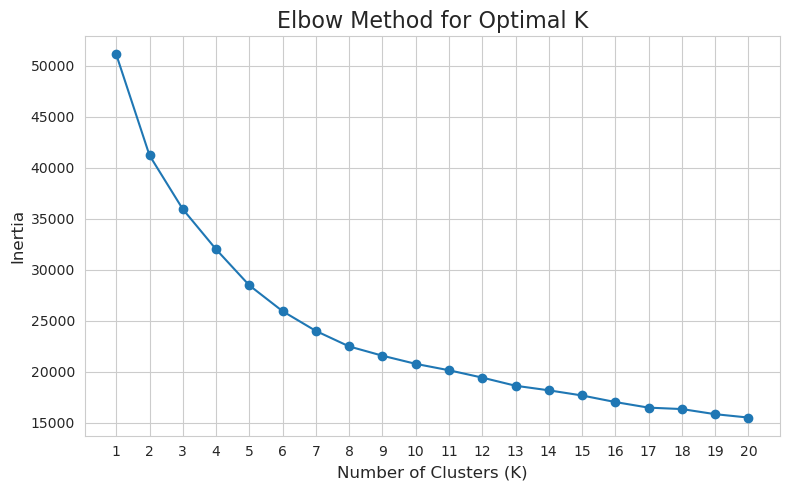


Distribution of samples per cluster (K=9):
| Cluster   | count   |
|:----------|:--------|
| 7         | 874     |
| 6         | 795     |
| 3         | 731     |
| 8         | 678     |
| 1         | 594     |
| 0         | 434     |
| 5         | 366     |
| 4         | 362     |
| 2         | 276     |

Mean values of features per cluster (K=9):
| Cluster   | id      | gender   | age     | hypertension   | heart_disease   | ever_married   | work_type   | Residence_type   | avg_glucose_level   | bmi     | smoking_status   | stroke     |
|:----------|:--------|:---------|:--------|:---------------|:----------------|:---------------|:------------|:-----------------|:--------------------|:--------|:-----------------|:-----------|
| 0         | 36098.8 | 0.430876 | 61.0161 | 1              | 0               | 0.898618       | 2.00691     | 0.497696         | 127.09              | 32.8664 | 1.73733          | 0.12212    |
| 1         | 35968.7 | 0        | 27.9192 | 0              | 0   

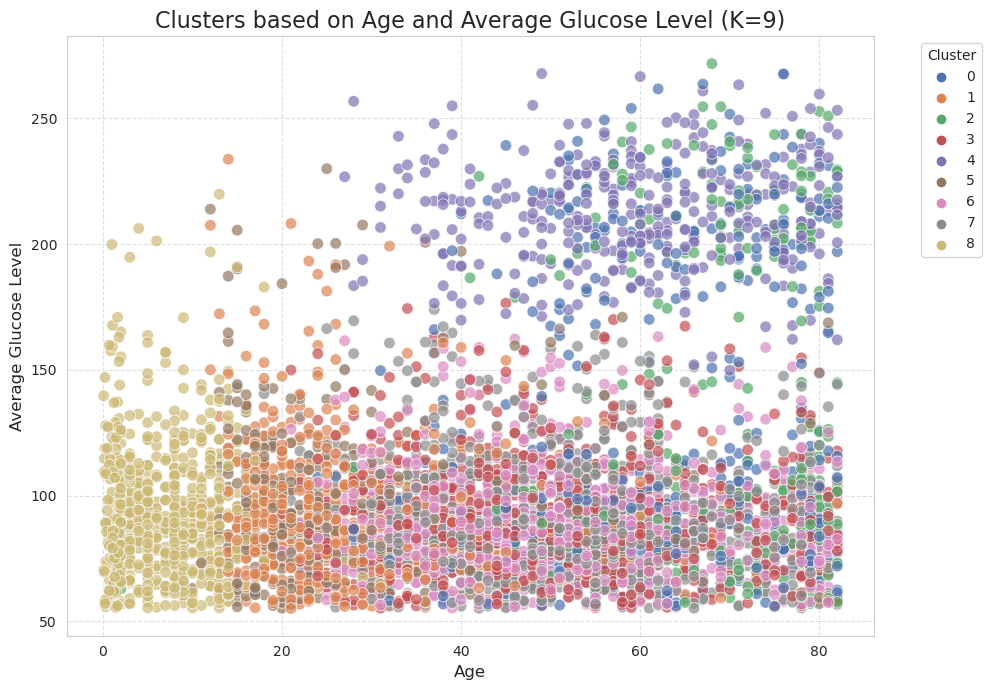

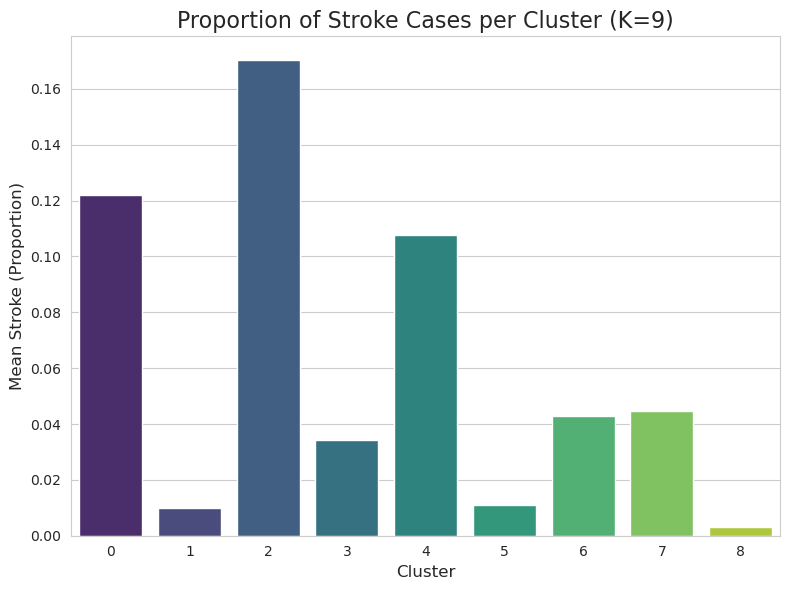

In [21]:
# --- Method 3: Multivariate Cluster Analysis (K-Means) ---
print("\n--- K-Means Cluster Analysis ---")

# It's often beneficial to scale features before clustering, especially for distance-based algorithms like K-Means.
# This prevents features with larger ranges from dominating the distance calculations.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Determine the optimal number of clusters using the Elbow Method (optional, but a good idea)
# Try a range of cluster numbers and plot the inertia (sum of squared distances of samples to their closest cluster center)
inertia = []
k_range = range(1, 21) # Test K from 1 to 20
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init to suppress warning
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_range, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Based on the elbow plot, a K of 9 is about where the slope is nearly unchanged.
# Although 17 may be more thorough, I'm sticking with 9.
# 
optimal_k = 9 # Ajust K based on the plot. Look for the slope to level off or stop changing.

# Apply K-Means clustering with the chosen K
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_model.fit_predict(X_scaled_df)

# Add cluster labels to the original (unscaled) DataFrame for easier interpretation
df['Cluster'] = clusters

print(f"\nDistribution of samples per cluster (K={optimal_k}):")
print(df['Cluster'].value_counts().to_markdown(numalign="left", stralign="left"))

# Analyze the characteristics of each cluster
print(f"\nMean values of features per cluster (K={optimal_k}):")
print(df.groupby('Cluster').mean().to_markdown(numalign="left", stralign="left"))

# Visualize clusters based on age and avg_glucose_level
# 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='age',
    y='avg_glucose_level',
    hue='Cluster',
    data=df,
    palette='deep', # or 'viridis', 'plasma', 'magma'
    s=70, # size of points
    alpha=0.7 # transparency
)
plt.title(f'Clusters based on Age and Average Glucose Level (K={optimal_k})', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Glucose Level', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# You can also visualize the proportion of stroke cases within each cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='stroke', data=df.groupby('Cluster')['stroke'].mean().reset_index(), palette='viridis')
plt.title(f'Proportion of Stroke Cases per Cluster (K={optimal_k})', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Mean Stroke (Proportion)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

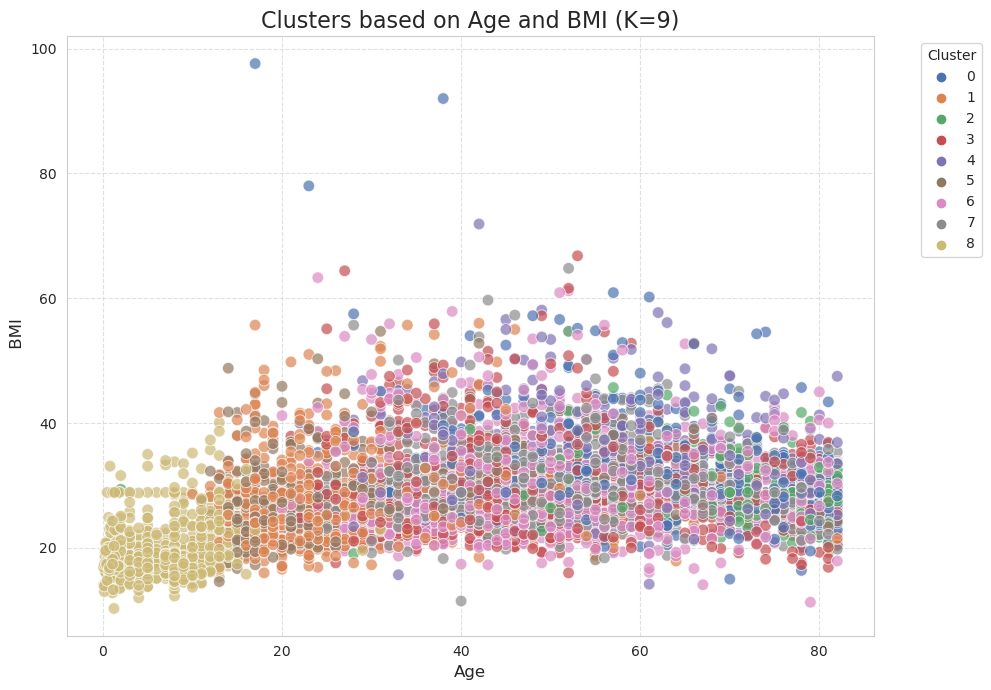

In [23]:
# Visualize clusters age and bmi
# 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='age',
    y='bmi',
    hue='Cluster',
    data=df,
    palette='deep', # or 'viridis', 'plasma', 'magma'
    s=70, # size of points
    alpha=0.7 # transparency
)
plt.title(f'Clusters based on Age and BMI (K={optimal_k})', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel(' BMI', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



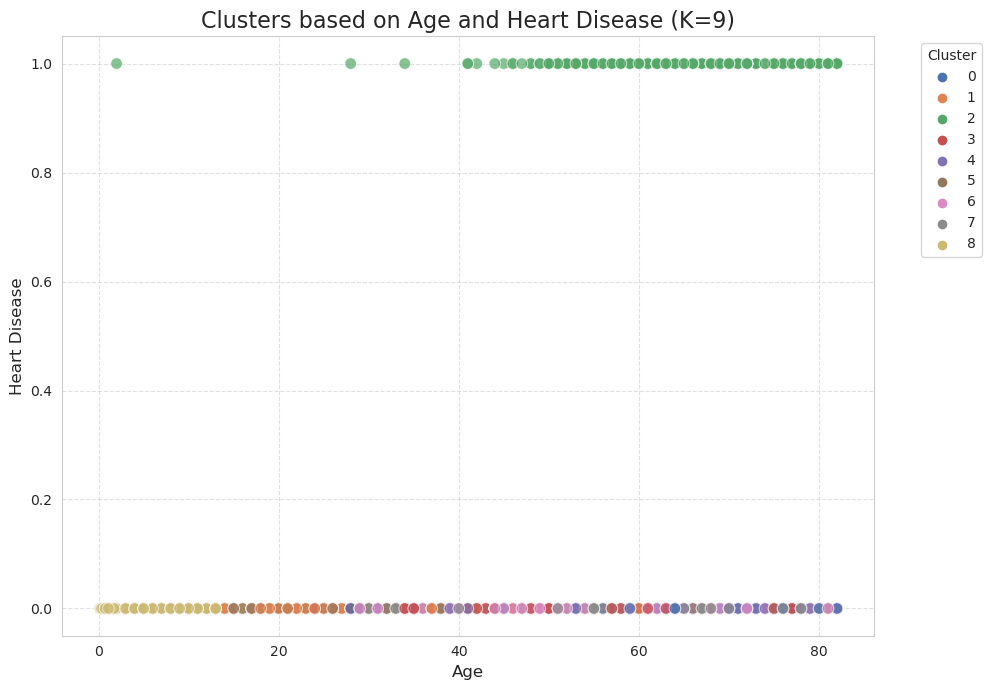

In [26]:
# Visualize clusters age and heart_disease
# 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='age',
    y='heart_disease',
    hue='Cluster',
    data=df,
    palette='deep', # or 'viridis', 'plasma', 'magma'
    s=70, # size of points
    alpha=0.7 # transparency
)
plt.title(f'Clusters based on Age and Heart Disease (K={optimal_k})', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Heart Disease', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

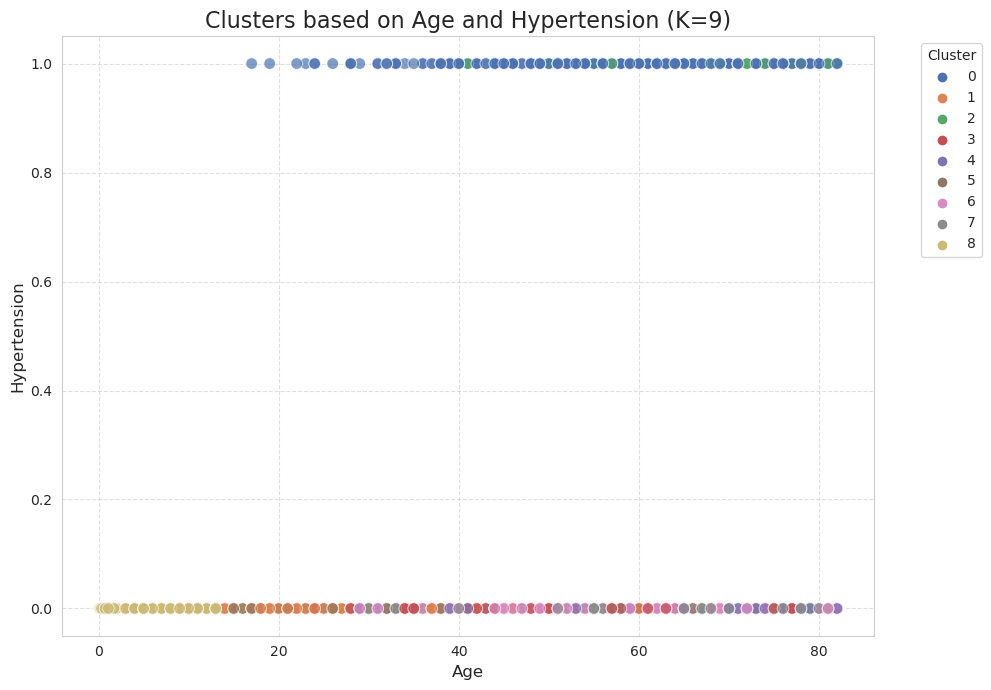

In [27]:
# Visualize clusters age and hypertension
# 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='age',
    y='hypertension',
    hue='Cluster',
    data=df,
    palette='deep', # or 'viridis', 'plasma', 'magma'
    s=70, # size of points
    alpha=0.7 # transparency
)
plt.title(f'Clusters based on Age and Hypertension (K={optimal_k})', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Hypertension', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()